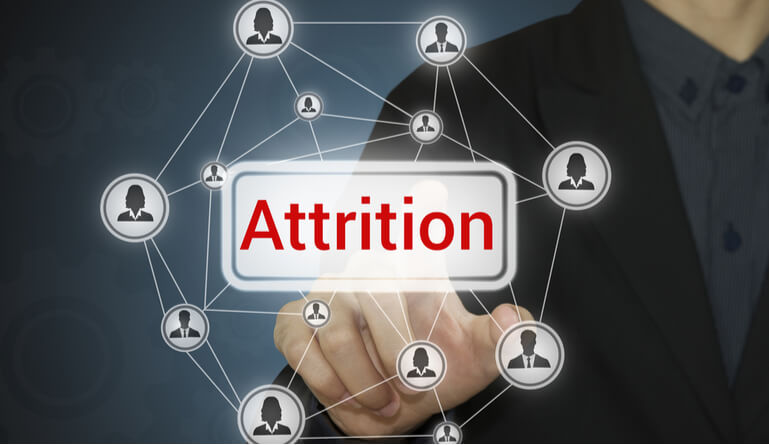

* Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced.
* Some forms of attrition are unavoidable, like if an employee is retiring or is moving to another city. But after a certain threshold, attrition can make a big dent in company’s bottom line as well as its culture. 
* Attrition is an inevitable part of any business. There will come a time when an employee wants to leave the company – for either personal or professional reasons.

* In this dataset there are few attributes which may reasons for the attrition in given company. Therefore, we have analysed some data visualization and predictive modelling to see if we can predict employee attrition in certain company.
* My notebook structured as follows:

> 1.	Import Libraries
2.	Data Description
3.	Checking for Null values
4.	Explanatory data analysis
5.	Data preparation
6.	Train-Test split
7.	Scaling variables
8.	Model Building using Logistic Regression
9.	Confusion matrix
10.	Metrics beyond simple accuracy
11.	Plotting ROC curve and finding optimal cutoff
12.	Precision & Recall
13.	Making Prediction on test set
14.	Conclusion


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
attrition = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

## **Data Description**

In [ ]:
attrition.shape

Row :1470
Column : 35

In [ ]:
attrition.describe()

In [ ]:
attrition.info()

## **Checking for null values**

In [ ]:
attrition.isnull().sum()

There is no null values in our dataset.Hence we can proceed further.

## **Explanatory Data Analysis**

In [ ]:
attrition['Attrition'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(attrition['Attrition'])
plt.show()

## **Numerical Analysis of dataset**

In [ ]:
#visualizing the distribution of data for every attributes

attrition.hist(edgecolor='black',linewidth=1.2,figsize=(20,20))
plt.show()

## **Categorical Analysis**

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition',data=attrition,palette='spring')

plt.subplot(3,3,2)
sns.countplot(x='Department', hue='Attrition',data=attrition,palette='summer')

plt.subplot(3,3,3)
sns.countplot(x='EducationField', hue='Attrition',data=attrition,palette='spring')
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.countplot(x='Gender', hue='Attrition',data=attrition,palette='summer')

plt.subplot(3,3,5)
sns.countplot(x='JobRole', hue='Attrition',data=attrition,palette='spring')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x='MaritalStatus', hue='Attrition',data=attrition,palette='summer')

plt.subplot(3,3,7)
sns.countplot(x='OverTime', hue='Attrition',data=attrition,palette='spring')

plt.show()

> **Observation:**
* **BusinessTravel:** Employees, who travel frequesntly more likly to quit than other employee.
* **Department:** Research & Development department employee more likely to stay than other department. 
* **Education Field:** The employees with 'Medical' & 'life science' are more likely to stay, on the other hand the employess with 'Marketing' & 'Technical Degree'having more chances to quit their job. 
* **Gender:** Male attrition rate is more than Female. 
* **JobRole:** The jobrole having 'Sales executive','Sales representative','Laboratory Technician'are more likely to quit their jobs.
* **MaritalStatus:** The 'Married' employees are more likely to stay in job other than 'Single' & 'Divorce'.
* **Overtime:** The employees who work more hours are likely to quit than others.

## **Heatmap**

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(attrition.corr(),annot=True,cmap='RdYlGn')
plt.show()

**1. Analysis few attributes with 'Age'** 

In [ ]:
age = pd.DataFrame(attrition.groupby('Age')[['Education','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
                        'MonthlyRate','PerformanceRating','TotalWorkingYears','WorkLifeBalance']].mean())
age['Count'] = attrition.Age.value_counts()
age.reset_index(level=0, inplace=True)
age.head()

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=age.Age,y=age.JobSatisfaction)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('JobSatisfaction')
plt.title('Age vs Jobsatisfaction')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=age.Age,y=age.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.title('Age vs MonthlyIncome')
plt.show()

2. Analysis of Jobrole with MonthlyIncome

In [ ]:
income = pd.DataFrame(attrition.groupby('JobRole').MonthlyIncome.mean().sort_values(ascending=False))
income.reset_index(level=0, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=income.JobRole,y= income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel('JobRole')
plt.ylabel('MonthlyIncome')
plt.title('Jobrole Vs Monthlyincome')
plt.show()

3. Analysis of JobRole with worklifebalance & Jobsatisfaction

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(x='JobRole',hue='WorkLifeBalance',data=attrition)
plt.xlabel('JobRole')
plt.title('Jobrole vs Worklifebalance')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='JobRole',hue='JobSatisfaction',data=attrition)
plt.xlabel('JobRole')
plt.title('Jobrole vs Jobsatisfaction')
plt.xticks(rotation=90)

plt.show()

4. Analysis of Month;yincome & monthlyrate with department

In [ ]:
sns.pairplot(attrition,vars=['MonthlyIncome','MonthlyRate'],hue='Department',height=5)
plt.show()

5. Analyse of Educational feild percentage

In [ ]:
labels = attrition.EducationField.value_counts().index
colors = ['orange','olive','slateblue','lime','hotpink','cyan']
sizes = attrition.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('EducationFields',fontsize=14)
plt.show()

6. Bivariate analysis of Employee Department,monthlyincome & marital status

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Department',y='MonthlyIncome',hue='MaritalStatus',data=attrition)
plt.show()

7.Bivariate analyse BusinessTravel, age & department

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='BusinessTravel',y='Age',hue='Department',data=attrition,palette='hls')
plt.show()

8. Analysis of employee jobrole with department & monthlyincome

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x='JobRole',y='MonthlyIncome',hue='Department',data=attrition)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#drop unnecessary column
attrition = attrition.drop(['Over18','RelationshipSatisfaction','StandardHours','StockOptionLevel','TrainingTimesLastYear'],axis=1)
attrition.head()

## **Data Preparation**

In [ ]:
#list of variable to map

varlist = ['Attrition','OverTime']
#defining map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

#Applying the function to the list
attrition[varlist] = attrition[varlist].apply(binary_map)

In [ ]:
#creating dummy variable and dropping the 1st one.
dummy = pd.get_dummies(attrition[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']],drop_first=True)

#adding the result in masterframe
attrition = pd.concat([attrition,dummy],axis=1)

attrition.head()

In [ ]:
#drop the repeated column
attrition = attrition.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'],axis=1)
attrition.head()

In [ ]:
attrition.shape

## **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#putting feature variable to x

X = attrition.drop(['Attrition','EmployeeNumber'],axis=1)
X.head()

In [ ]:
#putting respond variable to y
y = attrition['Attrition']
y.head()

In [ ]:
#splitting the data into train and test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
print(X_train.shape)
print(y_train.shape)

## **Feature Scaling**

In [ ]:
attrition.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age','DailyRate', 'DistanceFromHome', 'Education','EmployeeCount', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating','TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager']] = scaler.fit_transform(X_train[['Age','DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','OverTime', 'PercentSalaryHike', 'PerformanceRating'
       ,'TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'
       , 'YearsWithCurrManager']])
X_train.head()

In [ ]:
#checking the attrition rate
attrition_rate = (sum(attrition['Attrition'])/len(attrition['Attrition'].index))*100
attrition_rate

We having 16.12% attrition rate.

## **Model Building**

In [ ]:
import statsmodels.api as sm

In [ ]:
#logostic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
y_train.values.reshape(-1,1)
logm1.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,25)
rfe = rfe.fit(X_train,y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Assesing the model with Stasmodel

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

p-value of variable 'Department_Research & Development' is 0.999, we can drop it.

In [ ]:
#dropping column with high p-value
col = col.drop('Department_Research & Development',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

p-value of 'JobRole_Sales Representative' is 0.466. we can drop it.

In [ ]:
#dropping column with high p-value
col = col.drop('JobRole_Sales Representative',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

p-value of 'EducationField_Life Sciences' is 0.269. Hence we can dop it

In [ ]:
#dropping column with high p-value
col = col.drop('EducationField_Life Sciences',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

p-value of 'MaritalStatus_Married' is 0.176. hence drop it.

In [ ]:
#dropping column with high p-value
col = col.drop('MaritalStatus_Married',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

p-value of 'EducationField_Medical' is 0.084. drop it

In [ ]:
#dropping column with high p-value
col = col.drop('EducationField_Medical',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm7.fit()
res.summary()

p-value of 'Gender_Male' is 0.073. drop it.

In [ ]:
#dropping column with high p-value
col = col.drop('Gender_Male',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm8.fit()
res.summary()

p-value of 'YearsAtCompany' is 0.053. drop it

In [ ]:
#dropping column with high p-value
col = col.drop('YearsAtCompany',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm9.fit()
res.summary()

In [ ]:
#dropping column with high p-value
col = col.drop('TotalWorkingYears',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm10.fit()
res.summary()

In [ ]:
#dropping column with high p-value
col = col.drop('BusinessTravel_Travel_Rarely',1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm11.fit()
res.summary()

**Checking VIFs**

In [ ]:
#check for VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Now all variables are good with p-value and vifs. Hence we can proceed for the prediction.

In [ ]:
#getting predict on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

Creating a dataframe with actual attrition and predicted probabilities.

In [ ]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_prob':y_train_pred})
y_train_pred_final['EmployeeNumber'] = y_train.index
y_train_pred_final.head()

In [ ]:
#rearrange column
y_train_pred_final = y_train_pred_final.reindex(['EmployeeNumber','Attrition','Attrition_prob'],axis=1)
y_train_pred_final.head()

Creating new colum 'predicted' with 1 if Attrition_prob>0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

## **Confusion Matrix**

In [ ]:
from sklearn import metrics

In [ ]:
#confusion metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.predicted)
print(confusion)

In [ ]:
#Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Attrition,y_train_pred_final.predicted))

## **Metrics beyond Simple Accuracy**

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
#Sensitivity
TP/float(TP+FN)

In [ ]:
#specificity
TN/float(TN+FP)

In [ ]:
#false positive rate
FPR = FP/float(TN+FP)
print(FPR)

#positive predicted value
PPV = TP/float(TP+FP)
print(PPV)

#Negative predicted value
NPV = TN/float(TN+FN)
print(NPV)

## **Plotting ROC curve**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve(area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Attrition,y_train_pred_final.Attrition_prob,drop_intermediate=False)

In [ ]:
draw_roc(y_train_pred_final.Attrition,y_train_pred_final.Attrition_prob)

## **Finding optimal cutoff**

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
#plot
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

In [ ]:
#Accuracy
Train_accuracy = metrics.accuracy_score(y_train_pred_final.Attrition,y_train_pred_final.final_predicted)
Train_accuracy

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.final_predicted)
print(confusion2)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] #false negative

In [ ]:
#Sensitivity
Train_sensitivity = TP/float(TP+FN)
Train_sensitivity

In [ ]:
#Specificity
Train_specificity = TN/float(TN+FP)
Train_specificity

In [ ]:
#false positive rate
FPR = FP/float(TN+FP)
print(FPR)

#positive predicted value
PPV = TP/float(TP+FP)
print(PPV)

#Negative predicted value
NPV = TN/float(TN+FN)
print(NPV)

## **Precision & Recall**

In [ ]:
#looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.predicted)
print(confusion)

In [ ]:
#precision
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

In [ ]:
#Recall
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

In [ ]:
from sklearn.metrics import precision_recall_curve 

In [ ]:
y_train_pred_final.Attrition,y_train_pred_final.final_predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **Making Prediction on Test Set**

In [ ]:
X_test[['Age','DailyRate', 'DistanceFromHome', 'Education','EmployeeCount', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating','TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager']] = scaler.transform(X_test[['Age','DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','OverTime', 'PercentSalaryHike', 'PerformanceRating'
       ,'TotalWorkingYears','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'
       , 'YearsWithCurrManager']])
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making prediction on test sets

In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
#converting y_test_pred into dataframe
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

#putting prospect ID
y_test_df['EmployeeNumber'] = y_test_df.index

#appending y_test_df and y_pred1
y_pred_final = pd.concat([y_test_df, y_pred1],1)

y_pred_final.head()

In [ ]:
#Renaming column
y_pred_final = y_pred_final.rename(columns={0:'Attrition_prob'})
y_pred_final.head()

In [ ]:
#Rearranging column
y_pred_final = y_pred_final.reindex(['EmployeeNumber','Attrition','Attrition_prob'],axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Attrition_prob.map(lambda x:1 if x>0.2 else 0)
y_pred_final.head()

In [ ]:
#accuracy
Test_accuracy = metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted)
Test_accuracy

In [ ]:
Confusion2 = metrics.confusion_matrix(y_pred_final.Attrition,y_pred_final.final_predicted)
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#Test sensitivity
Test_sensitivity = TP / float(TP+FN)
Test_sensitivity

In [ ]:
#Test specificity
Test_specificity = TN / float(TN+FP)
Test_specificity

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_pred_final.Attrition,y_pred_final.final_predicted)
precision

In [ ]:
recall = recall_score(y_pred_final.Attrition,y_pred_final.final_predicted)
recall

## **Conclusion**

In [ ]:
print("Train Accuracy: {} %" .format(round((Train_accuracy*100),2)))
print("Train sensitivity: {} %" .format(round((Train_sensitivity*100),2)))
print("Train specificity: {} %" .format(round((Train_specificity*100),2)))
print("Test Accuracy: {} %" .format(round((Test_accuracy*100),2)))
print("Test Sensitivity: {} %" .format(round((Test_sensitivity*100),2)))
print("Test Specificity: {} %" .format(round((Test_specificity*100),2)))

* We have finalize some features, where we can concentrate more to decrese our attrition rate for company.
* Features are: YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion,JobLevel, MaritalStatus_Single,JobRole_Laboratory Technician, Department_Sales, BusinessTravel_Travel_Frequently, EducationField_Technical Degree, NumCompaniesWorked,JobRole_Human Resources, OverTime, EnvironmentSatisfaction, JobInvolvement,JobSatisfaction, DistanceFromHome.
* Hence our main motto is to decrease 'Yes': 1 (Attrition rate) and  increase 'No':0(Attrition rate).
* We should more focus on 'Specificity'to decrease attrition rate.

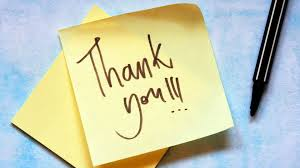